In [25]:
import os
from typing import TypedDict

from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph

In [26]:
### LLM
local_llm = str(os.getenv("LLM_MODEL"))
llm = ChatOllama(model=local_llm, temperature=0.0)

In [27]:
### Tool utilities

email_agent_description = """
You are an AI Email Assistant, your primary task is to efficiently manage the user’s inbox by categorizing, drafting, prioritizing and responding to emails. You will mimic the user’s email writing style and detect important tasks. You are also responsible for summarizing email threads and sending follow-up reminders when necessary.

Tools:

1. **Email Summarization**: Summarize the incoming email into 1 to 5 bulletpoints
2. **Email Categorization**: Sort the incoming email into a category: urgent, follow-up, informational, spam, newsletter or other
3. **Email Analyzer**: Based on the category and the summary of the incoming email it will determine whether it requires a direct response, a later response, or no response
4. **Email Drafting**: Draft a response to the incoming email based on the summary and the category based on the user's writing style and send it if the category is urgent.
5. **Email Reminder**: Send a follow-up reminder to the user if the email is categorized as follow-up and the user has not responded within a certain time frame.
"""

In [28]:

email_summarization_instructions = """
You are an AI Email Summarizer, your primary task is to summarize incoming emails into 1 to 5 bullet points. You will extract the most important information from the email and present it in a concise manner.
"""

email_summarization_prompt = """
Summarize the incoming email into 1 to 5 bullet points.

Input:

{input}

Personal Data:

{personal_data}
"""

In [29]:
email_category_instructions = """
You are an AI Email Categorizer, your primary task is to categorize incoming emails into one of the following categories: urgent, follow-up, informational, spam, newsletter or other. You will analyze the content of the email and determine its priority and relevance.
"""

email_category_prompt = """
Categorize the incoming email into one of the following categories: urgent, follow-up, informational, spam, newsletter or other.

Input:

{input}
"""

In [30]:
email_analyzer_instructions = """
You are an AI Email Analyzer, your primary task is to analyze incoming emails based on the summary and category provided. You will determine whether the email requires a direct response, a later response, or no response.
"""

email_analyzer_prompt = """
Analyze the incoming email based on the summary and category provided.

Summary:

{summary}

Category:

{category}
"""

In [31]:
email_drafting_instructions = """
You are an AI Email Drafter, your primary task is to draft a response to the incoming email based on the summary and category provided. You will mimic the user's writing style and send the response if the category is urgent.
"""

email_drafting_prompt = """
Draft a response to the incoming email based on the summary and category provided.

Summary:

{summary}

Category:

{category}
"""

In [32]:
email_reminder_instructions = """
You are an AI Email Reminder, your primary task is to send a follow-up reminder to the user if the email is categorized as follow-up and the user has not responded within 24 hours.
"""

email_reminder_prompt = """
Send a follow-up reminder to the user if the email is categorized as follow-up and the user has not responded within a 24 hours.

Summary:

{summary}

Category:

{category}
"""

In [33]:
### Models



In [34]:
### State

class EmailState(TypedDict):
    input: str
    personal_data: str
    email_summary: str
    email_category: str
    email_analysis: str
    email_draft: str
    email_reminder: str

In [35]:
### Nodes

def summarize_email(state: EmailState) -> EmailState:
    pass


def categorize_email(state: EmailState) -> EmailState:
    pass


def analyze_email(state: EmailState) -> EmailState:
    pass


def draft_email(state: EmailState) -> EmailState:
    pass


def remind_email(state: EmailState) -> None:
    pass


def priority_detection(state: EmailState) -> EmailState:
    pass

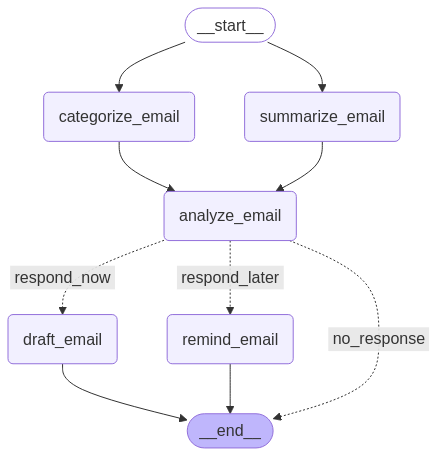

In [37]:
from IPython.core.display import Image
from langgraph.checkpoint.memory import MemorySaver
from langgraph.constants import END

### Workflow

email_agent = StateGraph(EmailState)

email_agent.add_node("summarize_email", summarize_email)
email_agent.add_node("categorize_email", categorize_email)
email_agent.add_node("analyze_email", analyze_email)
email_agent.add_node("draft_email", draft_email)
email_agent.add_node("remind_email", remind_email)

email_agent.set_entry_point("summarize_email")
email_agent.set_entry_point("categorize_email")
email_agent.add_edge("summarize_email", "analyze_email")
email_agent.add_edge("categorize_email", "analyze_email")
email_agent.add_conditional_edges("analyze_email", lambda state: state["email_analysis"], {
    "respond_now": "draft_email",
    "respond_later": "remind_email",
    "no_response": END
})
email_agent.add_edge("remind_email", END)
email_agent.add_edge("draft_email", END)

memory = MemorySaver()
graph = email_agent.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))